# <font color='#31394d'>k-Means Clustering Practice Exercise</font>

In this notebook, we are going to apply clustering algorithm to identify homogenous groups of customers from the `mall_customer.csv` dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### <font color='#31394d'>Import and Explore the Data</font>

In [2]:
df = pd.read_csv("data/mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


🚀 <font color='#D9C4B1'>Exercise: </font> Explore your data. How large is it? Are there any missing values? What are the data types?

In [6]:
# df.describe()
# Size - 200 rows, 5 columns
df.shape

# Check for missing values - No missing values
df.isna()

# Check data types - Integers and String
# CustomerID                 int64
# Gender                    object
# Age                        int64
# Annual Income (k$)         int64
# Spending Score (1-100)     int64
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

🚀 <font color='#D9C4B1'>Exercise: </font> The income and spending score columns have pretty awkward names. Rename them as "AnnualIncome" and "SpendingScore", respectively.

In [7]:
# Rename columns
df = df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


🚀 <font color='#D9C4B1'>Exercise: </font> Visualize the `Age` and `SpendingScore` distinguished by `Gender`.

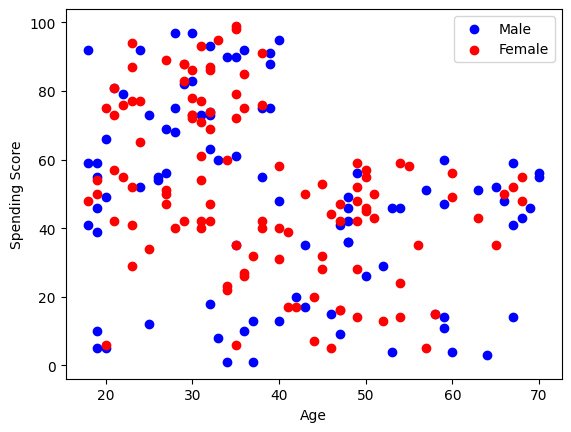

In [8]:
# Filter data for Male and Female
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

plt.scatter(male_data['Age'], male_data['SpendingScore'], color='blue', label='Male')
plt.scatter(female_data['Age'], female_data['SpendingScore'], color='red', label='Female')

# Add labels
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

# Show the plot
plt.show()

### <font color='#31394d'> Apply k-Means Clustering </font>

Let's attempt to identify clusters based on Age and SpendingScore. Using two variables will allow us to visualize the results, but feel free to re-run this with all the continuous variables. K-means clustering is not suitable for categorical variables.

In [10]:
from sklearn.cluster import KMeans

🚀 <font color='#D9C4B1'>Exercise: </font> Have a look at the help for `KMeans`. What do the "init" and "n_init" arguments do?

In [11]:
?KMeans

# n_init - 
# Number of times the k-means algorithm is run with different centroid
# seeds. The final results is the best output of `n_init` consecutive runs
# in terms of inertia. Several runs are recommended for sparse
# high-dimensional problems

# init
# Method for initialization:

#     'k-means++' : selects initial cluster centroids using sampling based on
#     an empirical probability distribution of the points' contribution to the
#     overall inertia. This technique speeds up convergence. The algorithm
#     implemented is "greedy k-means++". It differs from the vanilla k-means++
#     by making several trials at each sampling step and choosing the best centroid
#     among them.

#     'random': choose `n_clusters` observations (rows) at random from data
#     for the initial centroids.

#     If an array is passed, it should be of shape (n_clusters, n_features)
#     and gives the initial centers.

#     If a callable is passed, it should take arguments X, n_clusters and a
#     random state and return an initialization.

Let's perform k-Means clustering with k=4 (no particular reason, just as an example!)...

In [12]:
km = KMeans(n_clusters=4) # K = 4 
km.fit(df[['Age','SpendingScore']])

C:\Users\user\Documents\Python\VENVS\ds\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

🚀 <font color='#D9C4B1'>Exercise: </font> What attributes does the `km` object have?

In [13]:
?km
# Attributes
# cluster_centers_ | labels_ | inertia_ | n_iter_ | n_features_in_ | feature_names_in_

Let's have a look at cluster centroids:

In [14]:
pd.DataFrame(km.cluster_centers_, columns=['Age','SpendingScore'], index=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'])

,Age,SpendingScore
Cluster1,27.617021,49.148936
Cluster2,30.175439,82.350877
Cluster3,55.708333,48.229167
Cluster4,43.291667,15.020833


Let's add a column with the predicted cluster label:

In [15]:
df['Cluster'] = km.labels_ + 1
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1


Let's visualize our clusters. Note that we can only do this because this is a toy example with two features (so we can plot them in a 2D space). If we had more than three features, we would not be able to visualize the clusters, but we could still examine the cluster centroids to determine what the clusters represent.

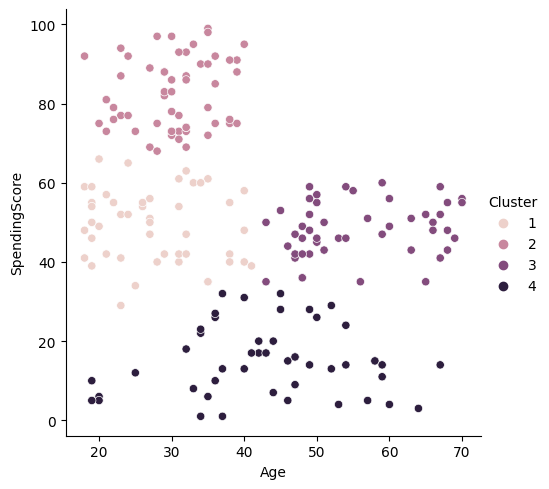

In [16]:
sns.relplot(x="Age", y="SpendingScore", data=df, hue="Cluster")

### <font color='#31394d'> Finding the Best k</font>

The `sklearn` `KMeans` method calls the total within-cluster variation "inertia". This is stored as the `inertia_` attribute of the fitted object. Next, we will loop over different values of k, store the inertia and choose the best value of k using the "elbow" method. 

In [17]:
inertia = []
for k in range(1 , 21):
    estimator = KMeans(n_clusters=k)
    estimator.fit(df[['Age','SpendingScore']])
    inertia.append(estimator.inertia_)

C:\Users\user\Documents\Python\VENVS\ds\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\Documents\Python\VENVS\ds\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\Documents\Python\VENVS\ds\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\Documents\Python\VENVS\ds\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

In [18]:
inertia

[171535.5,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23810.462233071365,
 19489.64388446867,
 15523.684014328755,
 13020.084512948222,
 11514.473062196295,
 10216.169888308861,
 9441.892194842194,
 8747.413836448639,
 8077.429006841971,
 7257.257664369404,
 6831.9729118920295,
 6176.063833163739,
 6057.738654440189,
 5506.315723733499,
 4969.973308133215,
 4670.105447330447]

<AxesSubplot: >

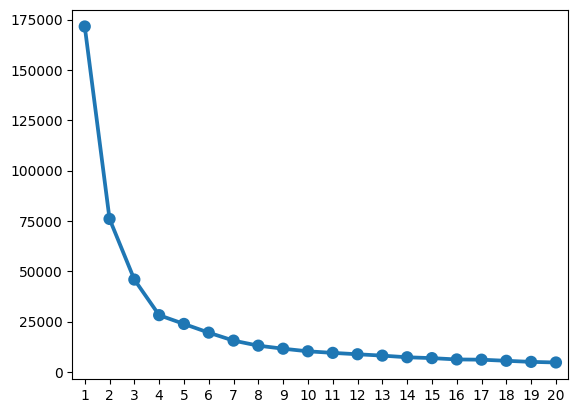

In [19]:
sns.pointplot(x=np.arange(1,21), y=inertia)

🚀 <font color='#D9C4B1'>Exercise: </font> How many clusters would you select? (There is no single "right" answer.)

In [ ]:
# 4 clusters